$$
\frac{d u}{d t}=\cos t
$$
Initial condition:
$$
u(0)=1
$$
The exact solution:
$$
u(t)=\sin t+1
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

PINN model using tensorflow

In [ ]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 20, activation = 'tanh'),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

NN.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 50)                100       
                                                                 
 dense_45 (Dense)            (None, 50)                2550      
                                                                 
 dense_46 (Dense)            (None, 20)                1020      
                                                                 
 dense_47 (Dense)            (None, 50)                1050      
                                                                 
 dense_48 (Dense)            (None, 50)                2550      
                                                                 
 dense_49 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7321 (28.60 KB)
Trainable params: 7321 (

In [ ]:
optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

ODE loss:
$$
L_{\mathrm{ODE}}=\frac{1}{n} \sum_{i=1}^{n}\left(\frac{d \mathrm{NN}\left(t_{i}\right)}{d t}-\cos t_{i}\right)^{2}
$$
Initial condition loss:
$$
L_{I C}=\frac{1}{n} \sum_{i=1}^{n}(\mathrm{NN}(0)-1)^{2}
$$
Total loss:
$$
L_{\text {Total }}=L_{\mathrm{ODE}}+L_{\mathrm{IC}}
$$

In [ ]:
def ode_system(t, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))

    with tf.GradientTape() as tape:
        tape.watch(t)

        u = net(t)
        u_t = tape.gradient(u, t)

    ode_loss = u_t - tf.math.cos(t)
    IC_loss = net(t_0) - one

    square_loss = tf.square(ode_loss) + tf.square(IC_loss)
    total_loss = tf.reduce_mean(square_loss)

    return total_loss

In [ ]:
train_t = np.linspace(0,2*np.pi,25)
train_loss_record = []

for itr in range(6000):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, NN.trainable_variables)
        optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 1000 == 0:
        print(train_loss.numpy())

1.5667497
9.2052185e-05
1.5479718e-05
1.9942434e-05
3.1560608e-06
4.3688855e-05


4/4 [==============================] - 0s 2ms/step


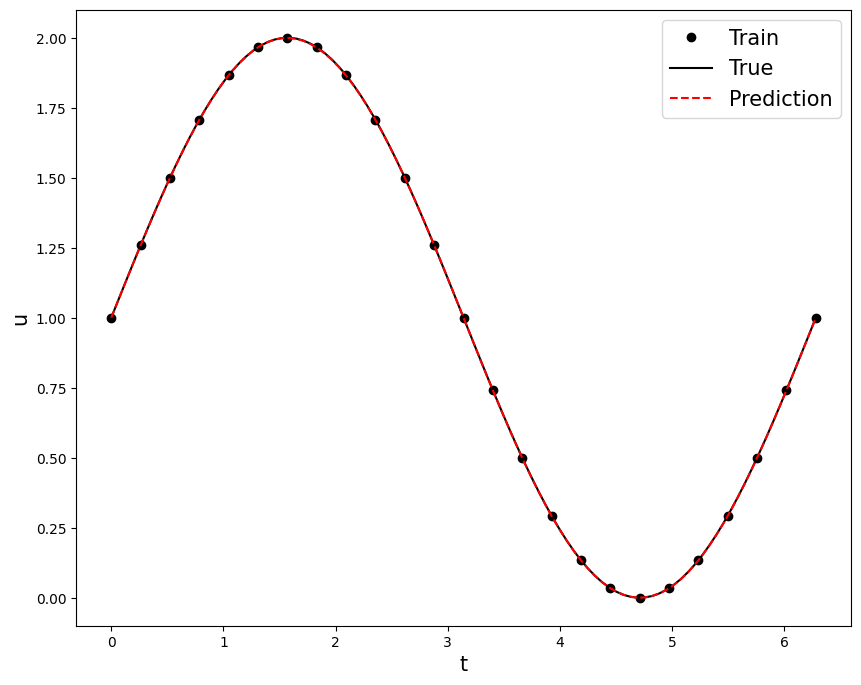

In [ ]:
test_t = np.linspace(0, 2*np.pi, 100)

train_u = np.sin(train_t)+1
true_u = np.sin(test_t)+1
pred_u = NN.predict(test_t).ravel()

plt.figure(figsize = (10,8))
plt.plot(train_t, train_u, 'ok', label = 'Train')
plt.plot(test_t, true_u, '-k',label = 'True')
plt.plot(test_t, pred_u, '--r', label = 'Prediction')
plt.legend(fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.show()


$$
\frac{d u}{d t}=\sin t
$$
Initial condition:
$$
u(0)=1
$$
The exact solution:
$$
u(t)=-\cos t+2
$$

In [ ]:
def ode_system(t, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))

    with tf.GradientTape() as tape:
        tape.watch(t)

        u = net(t)
        u_t = tape.gradient(u, t)

    ode_loss = u_t - tf.math.sin(t)
    IC_loss = net(t_0) - one

    square_loss = tf.square(ode_loss) + tf.square(IC_loss)
    total_loss = tf.reduce_mean(square_loss)

    return total_loss

In [ ]:
NN= None
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 20, activation = 'tanh'),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 50, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

NN.summary()
optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 50)                100       
                                                                 
 dense_51 (Dense)            (None, 50)                2550      
                                                                 
 dense_52 (Dense)            (None, 20)                1020      
                                                                 
 dense_53 (Dense)            (None, 50)                1050      
                                                                 
 dense_54 (Dense)            (None, 50)                2550      
                                                                 
 dense_55 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7321 (28.60 KB)
Trainable params: 7321 (

In [ ]:
train_t = np.linspace(0,2*np.pi,25)
train_loss_record = []

for itr in range(6000):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, NN.trainable_variables)
        optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 1000 == 0:
        print(train_loss.numpy())

1.4674234
7.023981e-05
1.9273046e-05
6.9000957e-06
5.908161e-06
1.2751832e-05


4/4 [==============================] - 0s 3ms/step


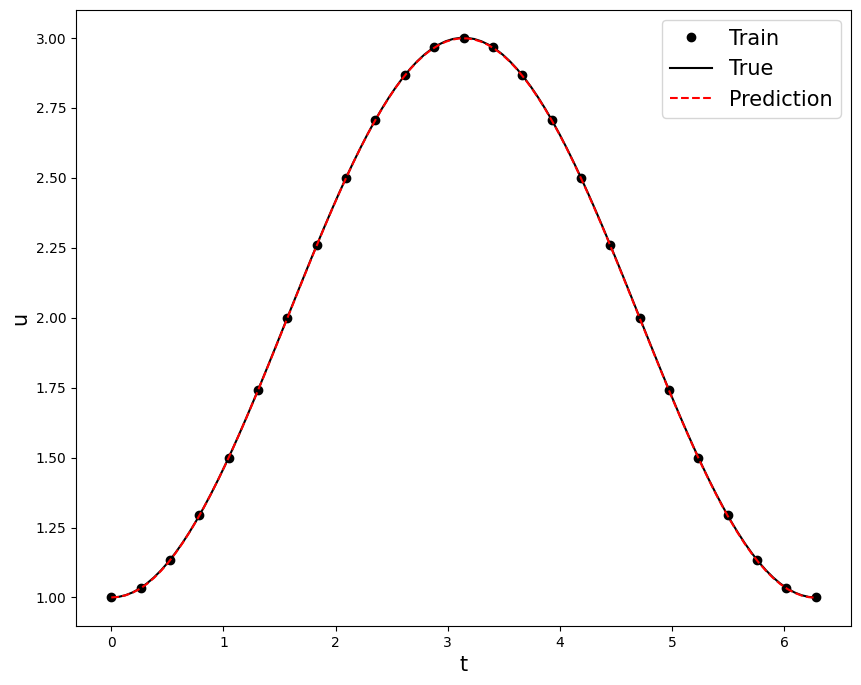

In [ ]:
test_t = np.linspace(0, 2*np.pi, 100)

train_u = -np.cos(train_t)+2
true_u = -np.cos(test_t)+2
pred_u = NN.predict(test_t).ravel()

plt.figure(figsize = (10,8))
plt.plot(train_t, train_u, 'ok', label = 'Train')
plt.plot(test_t, true_u, '-k',label = 'True')
plt.plot(test_t, pred_u, '--r', label = 'Prediction')
plt.legend(fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.show()
